<a href="https://colab.research.google.com/github/Qasim-Shah-73/British-Airways/blob/master/British_Airways_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

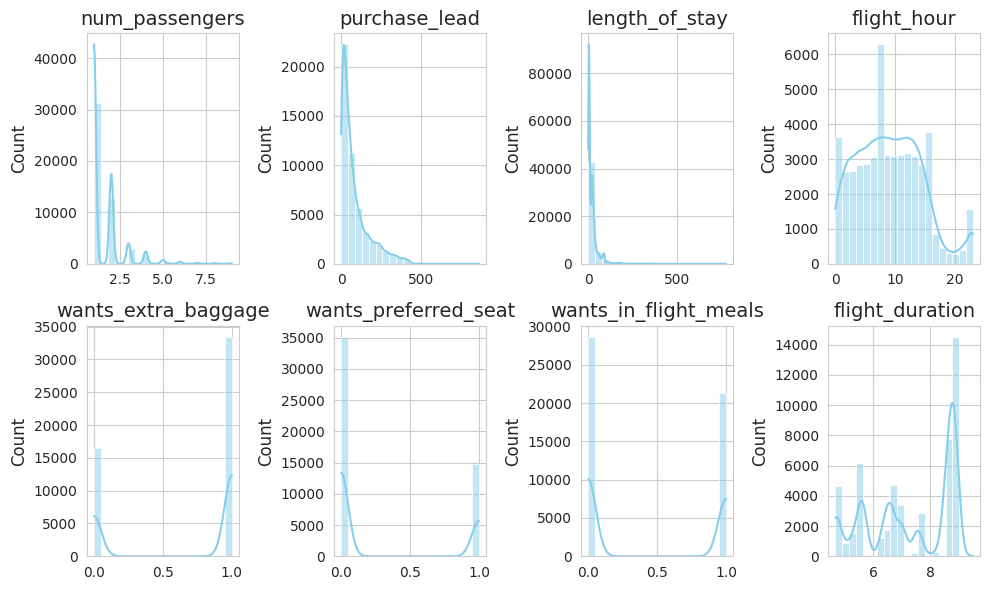

In [11]:
#Step 1: Exploratory Data Analysis

sns.set_style("whitegrid")

# Load the dataset
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")

# Histogram of numerical features
plt.figure(figsize=(10,6))
for i, col in enumerate(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration'], 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)
    plt.title(col, fontsize=14)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()



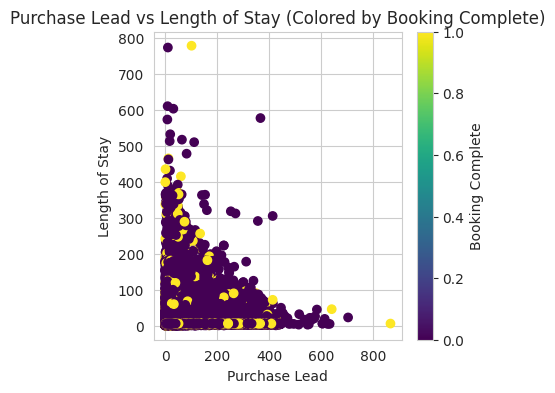

In [8]:
# Scatter plot with 'booking_complete' colored
plt.figure(figsize=(4, 4))
plt.scatter(df['purchase_lead'], df['length_of_stay'], c=df['booking_complete'], cmap='viridis')
plt.xlabel('Purchase Lead')
plt.ylabel('Length of Stay')
plt.title('Purchase Lead vs Length of Stay (Colored by Booking Complete)')
plt.colorbar(label='Booking Complete')
plt.show()

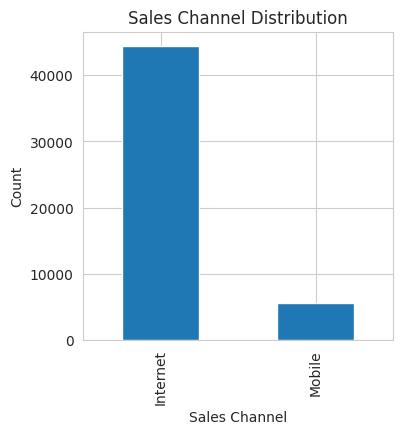

<Figure size 400x400 with 0 Axes>

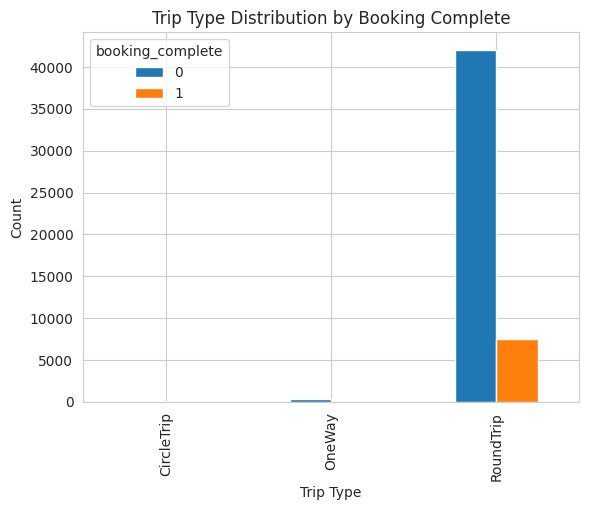

In [9]:
# Bar plot for 'sales_channel'
plt.figure(figsize=(4,4))
df['sales_channel'].value_counts().plot(kind='bar')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.title('Sales Channel Distribution')
plt.show()

# Bar plot for 'trip_type' grouped by 'booking_complete'
plt.figure(figsize=(4,4))
df.groupby(['trip_type', 'booking_complete']).size().unstack().plot(kind='bar')
plt.xlabel('Trip Type')
plt.ylabel('Count')
plt.title('Trip Type Distribution by Booking Complete')
plt.show()

In [21]:
df.dtypes

num_passengers          int64
purchase_lead           int64
length_of_stay          int64
flight_hour             int64
flight_day              int64
                       ...   
booking_origin_99     float64
booking_origin_100    float64
booking_origin_101    float64
booking_origin_102    float64
booking_origin_103    float64
Length: 918, dtype: object

In [23]:
# Convert categorical variables to numerical
categorical_cols = ['sales_channel', 'trip_type', 'route', 'booking_origin']
label_encoder = LabelEncoder()
for colname in df.select_dtypes("object"):
    df[colname], _ = df[colname].factorize()


# Handle missing values (if any)
numeric_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [24]:
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']
mutual_info = mutual_info_classif(X, y)


In [25]:
# Select top features based on mutual information scores
top_features = X.columns[mutual_info > 0.01]

X = X[top_features]
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [26]:
# Evaluate model performance
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

Accuracy: 0.852
Precision: 0.500
Recall: 0.001
F1-score: 0.001


Cross-validation F1-score: 0.045 (+/- 0.088)


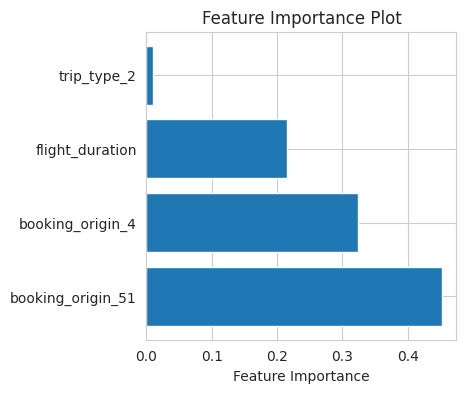

In [28]:
# Step 5: Model Evaluation and Interpretation

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1')
print(f"Cross-validation F1-score: {cv_scores.mean():.3f} (+/- {cv_scores.std():.3f})")

# Feature importance
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(4, 4))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()

Cross-validation F1-score: 0.045 (+/- 0.088)


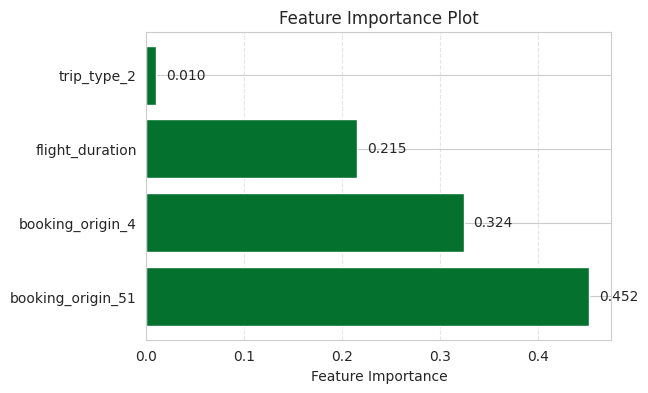

In [30]:
# Set Seaborn style and color palette
sns.set_style("whitegrid")
sns.set_palette("Greens_r")

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1')
print(f"Cross-validation F1-score: {cv_scores.mean():.3f} (+/- {cv_scores.std():.3f})")

# Feature importance
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(6, 4))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')

# Add grid lines
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

# Add annotations
for i, v in enumerate(feature_importance[sorted_idx]):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center')

plt.show()


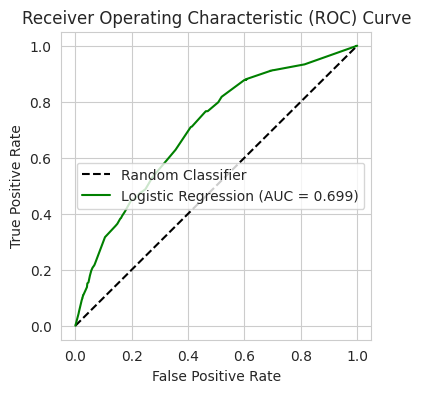

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict probabilities for test data
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.plot(fpr, tpr, color='green', label=f'Logistic Regression (AUC = {roc_auc:.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()